In [1]:
### ----------- 3 observations or inferences that can be made from the data. -------------------------- ###

# 1) There is a very positive linear relationship/regression line between the two variables/axis looking at mouse weight vs average tumor volume. The last scatter plot will show that as the weight of a mouse increases, the average tumor volume also increase for mice on this drug regimen ('Capomulin'). Also, according to the Pearson correlation coefficient, the correlation between mouse weight and tumor volume is 0.84 which suggests a strong postive relationship. Although the correlation looks to be strong, correlation is not the same as causation. But it is interesting

# 2) In looking at the summary statistics table of mean, median, variance, standard deviation, and SEM of the Tumor Volumes for each drug regimen, it looks like the most effective drugs are: Capomulin & Ramicane. They are nearly identical in every metric, to each other, but they best all other drugs by a margin.

# 3) In looking at female mouse subject "x401" line plot of Timepoint vs Tumor Volume, as well as the subject's overall data snapshot while on this drug regimen, it looks like the drug 'Capomulin' is very effective in treating her tumor volume over time. The decrease in tumor mass is steady, even as the subject's weight stays the same. Promising results for this drug regarding this subject. 

## Observations and Insights 

In [2]:
#matplotlib inline

In [3]:
## Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [4]:
## Preview of .csv
print(study_results.head())
print()
print(mouse_metadata.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16


In [5]:
## Combine the data into a single dataset
MergedMiceData_DF = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

## Display the data table for preview
MergedMiceData_DF.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
## Get info summary on database thus far
print(MergedMiceData_DF.describe())
MergedMiceData_DF.dtypes

        Age_months   Weight (g)    Timepoint  Tumor Volume (mm3)  \
count  1893.000000  1893.000000  1893.000000         1893.000000   
mean     12.814580    25.662441    19.572108           50.448381   
std       7.189592     3.921622    14.079460            8.894722   
min       1.000000    15.000000     0.000000           22.050126   
25%       7.000000    25.000000     5.000000           45.000000   
50%      13.000000    27.000000    20.000000           48.951474   
75%      20.000000    29.000000    30.000000           56.292200   
max      24.000000    30.000000    45.000000           78.567014   

       Metastatic Sites  
count       1893.000000  
mean           1.021659  
std            1.137974  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            2.000000  
max            4.000000  


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
## Check info on Mouse ID's (ie counts, values, unique ID's)
#MergedMiceData_DF['Mouse ID'].unique()
UniqMouseIDs = MergedMiceData_DF['Mouse ID'].nunique()
print(f'The number of unique Mouse IDs is: {UniqMouseIDs}.''\n')

## Checking the number of mice.
print(MergedMiceData_DF.count())
MergedMiceData_DF['Mouse ID'].value_counts()

The number of unique Mouse IDs is: 249.

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


g989    13
i557    10
c766    10
b559    10
j296    10
        ..
v199     1
h428     1
x226     1
o848     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
CleanMiceData_DF = MergedMiceData_DF
CleanMiceData_DF.head(5)
CleanMiceData_DF.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [9]:
## Optional: Get all the data for the duplicate mouse ID. 
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupMice = MergedMiceData_DF[MergedMiceData_DF.duplicated(["Mouse ID", "Timepoint"], keep=False)]

dupNumber = dupMice[['Mouse ID', 'Timepoint']].count()
print(f'The number of duplicates for data is: \n{dupNumber} ')
print()

## Showing the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
print("Here are the row numbers, Mouse IDs, and Timpepoints values that are repeated:")
print(dupMice[['Mouse ID', 'Timepoint']])
print()


The number of duplicates for data is: 
Mouse ID     10
Timepoint    10
dtype: int64 

Here are the row numbers, Mouse IDs, and Timpepoints values that are repeated:
    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20



In [10]:
## Creating cleaned merged dataset by dropping duplicate mice by their IDs from above DF.
## df.drop_duplicates([column(s)], keep, inplace) - Returns DF w/dup rows from columns removed 

CleanMiceData_DF = CleanMiceData_DF.drop_duplicates(["Mouse ID", "Timepoint"], keep=False, inplace=False)

## OR could also have used:
#CleanMiceData_DF = MergedMiceData_DF.drop_duplicates(subset=["Mouse ID","Timepoint"])


# Checking the number of mice in the clean DataFrame.
print(CleanMiceData_DF.count())
UniqMouseIDs = CleanMiceData_DF['Mouse ID'].nunique()
print(f'The number of unique Mouse IDs is: {UniqMouseIDs}.''\n')

Mouse ID              1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
dtype: int64
The number of unique Mouse IDs is: 249.



## Summary Statistics

In [11]:
# Preview of dataframe for code reference
CleanMiceData_DF.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:

## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: # mean, median, variance, standard deviation, and SEM of the tumor volume. 

DrugMean = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
DrugMedian = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
DrugVari = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
DrugStdDev = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
DrugSEM = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

#print(DrugMean)
#print(DrugMedian)
#print(DrugVari)
#print(DrugStdDev)
#print(DrugSEM)

In [13]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. Assemble the resulting series into a single summary dataframe.

SummaryDrugReg_DF = pd.DataFrame({
    "Mean": DrugMean, "Median": DrugMedian, "Variance": DrugVari, 
    "Std Deviation": DrugStdDev, "SEM": DrugSEM})
#SummaryDrugReg_DF

SummaryDrugReg_DF.style.set_caption('TUMOR VOLUME VALUES')


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. Using the aggregation method, produce the same summary statistics in a single line
#  = df.groupby(['Drug GrpBy Col']).agg({('Tumor Vol Col'):["mean", "median", "var", "std", "sem"]})

AggSummary = CleanMiceData_DF.groupby(["Drug Regimen"]).agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

AggSummary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [15]:
## In looking at the summary statistics table of mean, median, variance, standard deviation, and SEM of the Tumor Volumes for each drug regimen, it looks like the most effective drugs are: Capomulin & Ramicane. They are nearly identical in every metric, to each other, but they best all other drugs by a margin.

## Bar and Pie Charts

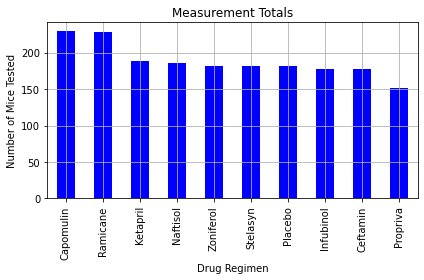

In [16]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
## Groupby on Drug Regimen
DrugRegimen = CleanMiceData_DF.groupby(["Drug Regimen"])
#DrugRegimen = CleanMiceData_DF.groupby("Drug Regimen")['Mouse ID'].count()
#DrugRegimen.head(10)

## Number of mice used for each drug ( for Y axis)
UniqMouseIDs = DrugRegimen['Mouse ID'].count()

## Ordering greatest to lowest
UniqMouseIDs.sort_values(ascending=False, inplace=True)

## Panda bar plot with index/Regimen as x-axis, and 'Mouse ID' count as y-axis)
UniqMouseIDs.plot(kind='bar', y ='Mouse ID', color='b', align="center")

## Label for y-axis, setting a tight layout, and saving fig to 'data' folder
plt.grid()
plt.ylabel("Number of Mice Tested")
plt.title("Measurement Totals")
plt.tight_layout()
plt.savefig("data/Bar_Panda_MiceTestedRegimen.jpg", dpi=200)
plt.show()


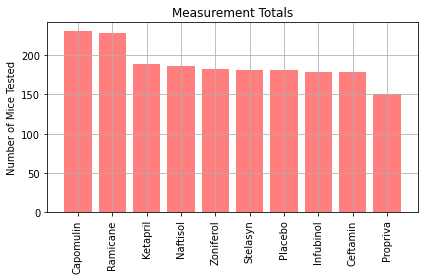

In [17]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. 
## Using some of the same variables (DrugRegimen & UniqMouseIDs) 
## X-axis based on length of Regimens
X_AxisDrugs = np.arange(len(DrugRegimen))

plt.bar(X_AxisDrugs, UniqMouseIDs, color='r', alpha=.5, align="center")
plt.xticks(X_AxisDrugs, labels=UniqMouseIDs.index, rotation="90") #labels=DrugRegimen

plt.grid()
plt.title("Measurement Totals")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.savefig("data/Bar_Plyplot_MiceTestedRegimen.jpg", dpi=200)

plt.show()


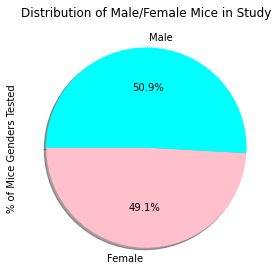

In [18]:
## Generate a pie plot showing the distribution of female versus male mice using pandas

## Generate data on mice results based on sex of mice
MiceGender = CleanMiceData_DF.groupby(["Sex"])
GenderResults = MiceGender['Drug Regimen'].count()
GenderResults

GenderResults.plot(kind='pie', labels=GenderResults.index, colors=("pink", "cyan"),
        autopct="%1.1f%%", shadow=True, startangle=-180)

## Label for y-axis, setting a tight layout, and saving fig to 'data' folder

plt.ylabel("% of Mice Genders Tested")
plt.title("Distribution of Male/Female Mice in Study")
plt.tight_layout()
plt.savefig("data/Pie_Panda_MiceGenders.jpg", dpi=200)
plt.show()


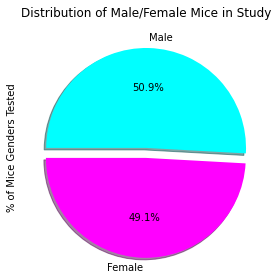

In [19]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
MiceGender = CleanMiceData_DF.groupby(["Sex"])
GenderResults = MiceGender['Drug Regimen'].count()

plt.pie(GenderResults, explode = (0.1,0.0), labels=GenderResults.index, colors=("magenta", "aqua"),
        autopct="%1.1f%%", shadow=True, startangle=-180)

plt.ylabel("% of Mice Genders Tested")
plt.title("Distribution of Male/Female Mice in Study")
plt.tight_layout()
plt.savefig("data/Pie_Plyplot_MiceGenders.jpg", dpi=200)

plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

## Start by getting the last (greatest) timepoint for each mouse 
MiceTumorStudy_DF = CleanMiceData_DF
MiceTumorStudy_DF

MiceTumorStudy_DF = MiceTumorStudy_DF.groupby('Mouse ID').max().reset_index()
MiceTumorStudy_DF

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MiceTumorStudy_DF = MiceTumorStudy_DF[['Mouse ID','Timepoint']].merge(CleanMiceData_DF, on=['Mouse ID','Timepoint'], how="left")

MiceTumorStudy_DF.head(5)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [21]:
## Create dataframe for all data of just 4 drug regimens to review: 
## "Capomulin", "Ramicane", "Infubinol", "Ceftamin"


All4MiceData = MiceTumorStudy_DF.loc[(MiceTumorStudy_DF['Drug Regimen'] == 'Capomulin') | 
(MiceTumorStudy_DF['Drug Regimen'] == 'Ramicane') | 
(MiceTumorStudy_DF['Drug Regimen'] == 'Infubinol') | 
(MiceTumorStudy_DF['Drug Regimen'] == 'Ceftamin'),:] 
All4MiceData


## Create a df of just the 4 Drug Regimen and their Tumor Vol column data
DrugTumorData = All4MiceData[['Drug Regimen','Tumor Volume (mm3)']]

All4MiceData[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)']].head(10)
#All4MiceData


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
10,a520,Ramicane,38.810366
11,a577,Infubinol,57.031862
12,a644,Ramicane,32.978522
13,a685,Infubinol,66.083066
19,b128,Capomulin,38.982878


In [22]:
## Put treatments into a list for a 'for loop' (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Create empty list to fill with tumor vol data (for plotting)
TumorVolumes = []

## Created an extra list to hold outlier boolean values/check
OutlierCheck = []

## Counter for loop to iterate through Treatment list
CurrentDrug = 0
X = ''

## Calculate the IQR and quantitatively determine if there are any potential outliers. 
    ## Locate the rows which contain mice on each drug and get the tumor volumes, add subset
    ## Determine outliers using upper and lower bounds
    ## If the data is in a dataframe, we use pandas to give quartile calculations

for treatment in Treatments:
    
    ## Passing through list, filter data by the individual drugs and their Tumor Volumes column data
    TreatmentData = DrugTumorData[DrugTumorData['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    ## Perform calcuations for quartile, iqr, etc
    quartiles = TreatmentData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    ## Append the Tumor Volume columns' data (for each drug) to list for future plotting
    TumorVolumes.append(TreatmentData)

    ## Checking for outliers above/below bound thresholds
    outliers = (TreatmentData < lower_bound) | (TreatmentData > upper_bound)
    
    ## Rename/name new DF to give it a column title
    outliers = outliers.to_frame(f"{Treatments[CurrentDrug]} outliers check:")
    
    ## Any outlier that returns a True boolean is tagged and added to Outlier check
    ## This will be used to locate the index row of the outlier and it's values to print from main DF
    FoundOutlier = outliers.index[outliers[f"{Treatments[CurrentDrug]} outliers check:"] == True].tolist()
    OutlierCheck.append(outliers)

    ## If no outliers are found, return just the lower/upper bound data, 
    # CurrentDrug counter will increase by 1 to iterate through treatment list to next drug
    if not FoundOutlier:

        print(f"Drug Regimen: '{treatment}' has a Lower Bound of: {lower_bound} and Upper Bound of: {upper_bound}. \n          There are no potential outliers within the '{treatment}' dataset. \n")
        CurrentDrug += 1


    ## If outlier is found, we will get the index number to cross reference in another dataframe to return values.
    ## Will then print lower/upper bound data as well as an ID and outlier value found. Iterate up through Treatment list.
    ## There is an outlier with the drug "Infubinol" of the 4 drug regimens.
    else:
        
        ## Changing the returned list (and number/index) into an integer that can be concatinated as an index to find 'Mouse ID'
        X = int("".join(str(i) for i in FoundOutlier))
        MouseId = All4MiceData['Mouse ID'][X]
        print(f"Drug Regimen: '{treatment}' has a Lower Bound of: {lower_bound} and Upper Bound of: {upper_bound}. \n          Mouse ID: '{MouseId}' is a potential outlier for '{treatment}' with a tumor volume of: {TreatmentData[X]}. \n")
        CurrentDrug += 1


Drug Regimen: 'Capomulin' has a Lower Bound of: 20.70456164999999 and Upper Bound of: 51.83201549. 
          There are no potential outliers within the 'Capomulin' dataset. 

Drug Regimen: 'Ramicane' has a Lower Bound of: 17.912664470000003 and Upper Bound of: 54.30681135. 
          There are no potential outliers within the 'Ramicane' dataset. 

Drug Regimen: 'Infubinol' has a Lower Bound of: 36.83290494999999 and Upper Bound of: 82.74144559000001. 
          Mouse ID: 'c326' is a potential outlier for 'Infubinol' with a tumor volume of: 36.321345799999996. 

Drug Regimen: 'Ceftamin' has a Lower Bound of: 25.355449580000002 and Upper Bound of: 87.66645829999999. 
          There are no potential outliers within the 'Ceftamin' dataset. 



In [23]:
## Print commands resource to review findings and test data

#print(TreatmentData[FoundOutlier])
#print(FoundOutlier)
#print(lower_bound)
#print(upper_bound)
#print()

#HighOutlier = (TreatmentData > upper_bound)
#LowOutlier = (TreatmentData < lower_bound)
#print(HighOutlier)
#print(LowOutlier)
#print(outliers)
#print()

#print(X)
#MouseId
#print(TreatmentData)
#print(OutlierCheck)
#print(TumorVolumes)
#All4MiceData[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)']].head(35)


<ipython-input-34-f9d83e3540f0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Treatments)


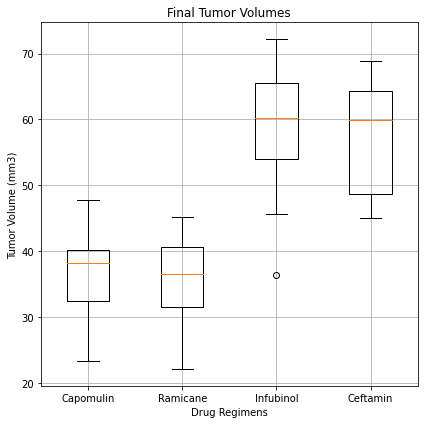

In [34]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize = (6, 6))
#fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes")
ax1.set_xlabel("Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(Treatments)

ax1.boxplot(TumorVolumes)

plt.grid()
plt.tight_layout()
plt.savefig("data/BoxPlot_FinalTumorVolumes.jpg", dpi=200)
plt.show()

## Line and Scatter Plots

In [25]:
#CapomulinData = DrugTumorData[DrugTumorData['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
#All4MiceData[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)']]
#CapomulinData = All4MiceData.loc[All4MiceData['Drug Regimen'] == 'Capomulin'),:]
#CapomulinData = CleanMiceData_DF.loc[CleanMiceData_DF['Drug Regimen'] == 'Capomulin',:]


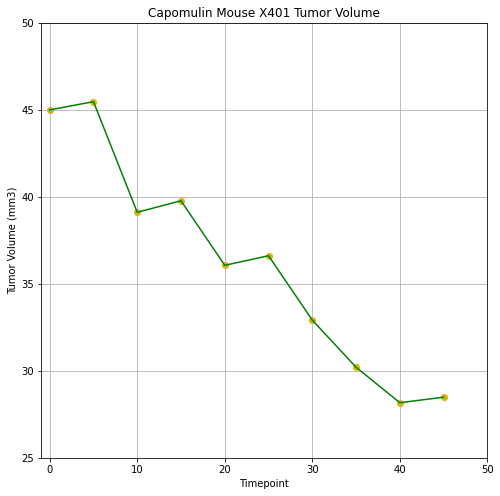

In [26]:

## Using original cleaned/unedited dataframe, filter by 'Capomulin'
CapomulinData = CleanMiceData_DF.loc[CleanMiceData_DF['Drug Regimen'] == 'Capomulin',:]
CapomulinData

## Choose a mouse to eventually use as an example of Tumor Volumes over Timepoints
MouseX401 = CleanMiceData_DF.loc[CleanMiceData_DF['Mouse ID'] == 'x401',:]

## Create X/Y-axis for charts to represent Timepoint column data and Tumor Vol data for Mouse X401
Timepoint_xaxis = MouseX401["Timepoint"]
TumorVol_yaxis = MouseX401["Tumor Volume (mm3)"]

## Plot Line Chart
fig1, ax1 = plt.subplots(figsize = (8, 8))
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim([-1, 50])
plt.ylim([25, 50])

plt.plot(Timepoint_xaxis, TumorVol_yaxis, color = "g", label=f"Mouse x401") 
plt.scatter(Timepoint_xaxis, TumorVol_yaxis, color = "y", alpha=1, edgecolor="orange")
## Added scatter for fun :) and practice for next chart

plt.title("Capomulin Mouse X401 Tumor Volume")
plt.grid()
plt.savefig("data/Line_Plyplot_MouseX401Tumor.jpg", dpi=200)
plt.show()


In [27]:
## Checking overall data on subject mouse
MouseX401

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [28]:
## In looking at female mouse subject "x401" line plot of Timepoint vs Tumor Volume, as well as the subject's overall data snapshot while on this drug regimen, it looks like the drug 'Capomulin' is very effective in treating her tumor volume over time. The decrease in tumor mass is steady, even as the subject's weight stays the same. Promising results for this drug regarding this subject.

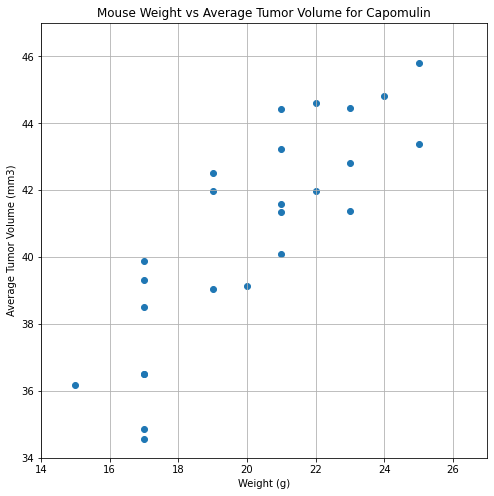

In [29]:
# Generate a scatter plot of mouse weight vs average/mean tumor volume for the Capomulin regimen
CapolmulinMean = CapomulinData.groupby(["Mouse ID"]).mean()

fig1, ax1 = plt.subplots(figsize = (8, 8))
plt.scatter(CapolmulinMean["Weight (g)"], CapolmulinMean["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim([14, 27])
plt.ylim([34, 47])
plt.grid()

plt.savefig("data/Scatter_Plyplot_WeightVsTumor.jpg", dpi=200)
plt.show()

## Correlation and Regression

In [30]:
## Calculate the correlation coefficient for mouse weight(x-axis) vs tumor volume(y-axis) from scatter above
## CapolmulinMean["Weight (g)"]  , CapolmulinMean["Tumor Volume (mm3)"]
## correlation = round(st.pearsonr(x-ax,y-ax)[0],2)

correlation = round(st.pearsonr(CapolmulinMean["Weight (g)"], CapolmulinMean["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mouse weight and tumor volume is {correlation}.")

The correlation coefficient between mouse weight and tumor volume is 0.84.


The r-squared is: 0.7088568047708717


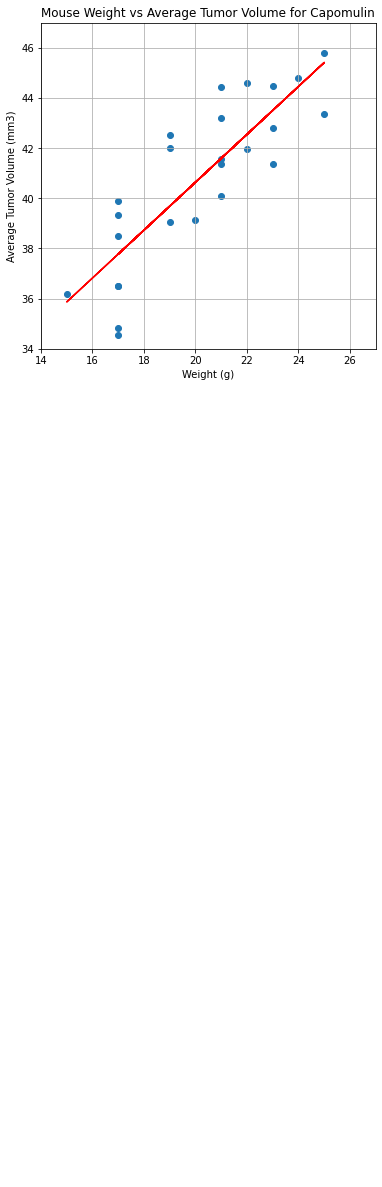

In [31]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen from scatter plot
CapolmulinMean = CapomulinData.groupby(["Mouse ID"]).mean()

fig1, ax1 = plt.subplots(figsize = (6, 6))

## Linear Regression formulation
x_values = CapolmulinMean["Weight (g)"]
y_values = CapolmulinMean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,1), fontsize=15, color="red")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim([14, 27])
plt.ylim([34, 47])
plt.grid()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("data/LineRegress_Plyplot_WeightVsTumor.jpg", dpi=200)
plt.show()

## There is a very positive linear relationship/regression line between the two variables/axis. As the weight of a mouse increases, the average tumor volume also increase for mice on this drug regimen of 'Capomulin'. Note: Correlation looks to be strong but correlation is not the same as causation.

In [32]:
### _______________________  Ithamar Francois   _______________________ ### 